In [22]:
%pip install pandas
%pip install openpyxl
%pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from pandas.io.formats.excel import ExcelFormatter
# Download a CSV file
data_url = './Insurance Claim.csv'

# Read the CSV and store it in a DataFrame
df = pd.read_csv(data_url)
# df_excel = df.to_excel("insurance claim.xlsx", sheet_name="insuranceclaim", index=False)



In [6]:
print(df)

      index  PatientID   age  gender   bmi  bloodpressure diabetic  children  \
0         0          1  39.0    male  23.2             91      Yes         0   
1         1          2  24.0    male  30.1             87       No         0   
2         2          3   NaN    male  33.3             82      Yes         0   
3         3          4   NaN    male  33.7             80       No         0   
4         4          5   NaN    male  34.1            100       No         0   
...     ...        ...   ...     ...   ...            ...      ...       ...   
1335   1335       1336  44.0  female  35.5             88      Yes         0   
1336   1336       1337  59.0  female  38.1            120       No         1   
1337   1337       1338  30.0    male  34.5             91      Yes         3   
1338   1338       1339  37.0    male  30.4            106       No         0   
1339   1339       1340  30.0  female  47.4            101       No         0   

     smoker     region     claim  
0   

In [24]:
# Check for missing values in each column
columns_with_missing_data = df.isna().any()

# Print the columns with missing data
print(columns_with_missing_data)

index            False
PatientID        False
age               True
gender           False
bmi              False
bloodpressure    False
diabetic         False
children         False
smoker           False
region            True
claim            False
dtype: bool


count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64


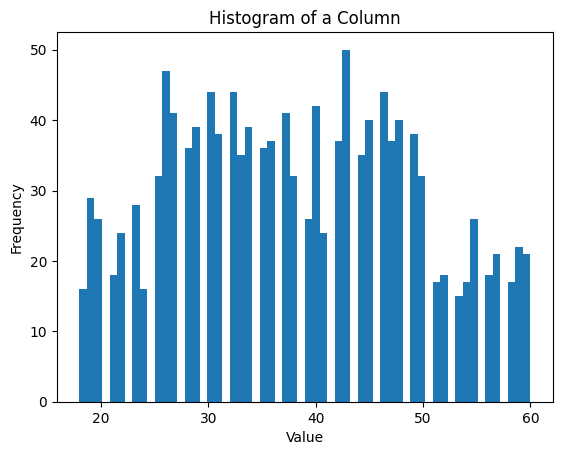

In [25]:
age_descriptive_stats = df['age'].describe()
print(age_descriptive_stats)

import matplotlib.pyplot as plt

plt.hist(df['age'], bins=60)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of a Column')
plt.show()

In [26]:
# fill null value in age column with mean
df["age"] = df["age"].fillna(38)


count          1337
unique            4
top       southeast
freq            443
Name: region, dtype: object
_________
region
southeast    443
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64


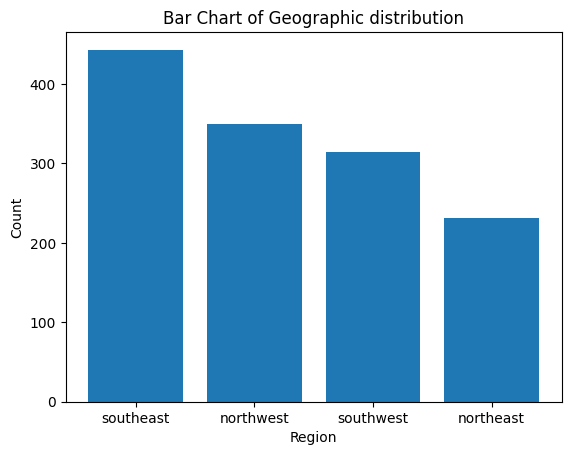

In [27]:
# check the distribution of regions
region_descriptive_stats = df['region'].describe()
print(region_descriptive_stats)

import matplotlib.pyplot as plt

# Calculate the frequency of each unique value in the column
value_counts = df['region'].value_counts()
print('_________')
print(value_counts)
# Create a bar chart
plt.bar(value_counts.index, value_counts.values)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Bar Chart of Geographic distribution')

# Show the chart
plt.show()

In [28]:
# fill null value in region column with southeast
df["region"] = df["region"].fillna('southeast')

In [29]:
# Create a mapping dictionary for gender
gender_mapping = {'male': 0, 'female': 1}

# Use the replace method to convert the 'Gender' column
df['gender'] = df['gender'].replace(gender_mapping)

In [30]:
# Create a mapping dictionary for diabetes
mapping = {'No': 0, 'Yes': 1}

# Use the replace method to convert the 'Gender' column
df['diabetic'] = df['diabetic'].replace(mapping)

df['smoker'] = df['smoker'].replace(mapping)

In [31]:
# Convert the 'Region' column to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['region'],dtype=int, prefix=['region'])

# drop the first 2 columns
df_encoded = df_encoded.drop(columns=['index','PatientID'])

In [32]:
print(df_encoded)

       age  gender   bmi  bloodpressure  diabetic  children  smoker     claim  \
0     39.0       0  23.2             91         1         0       0   1121.87   
1     24.0       0  30.1             87         0         0       0   1131.51   
2     38.0       0  33.3             82         1         0       0   1135.94   
3     38.0       0  33.7             80         0         0       0   1136.40   
4     38.0       0  34.1            100         0         0       0   1137.01   
...    ...     ...   ...            ...       ...       ...     ...       ...   
1335  44.0       1  35.5             88         1         0       1  55135.40   
1336  59.0       1  38.1            120         0         1       1  58571.07   
1337  30.0       0  34.5             91         1         3       1  60021.40   
1338  37.0       0  30.4            106         0         0       1  62592.87   
1339  30.0       1  47.4            101         0         0       1  63770.43   

      region_northeast  reg

In [18]:
import numpy as np
# Find outliers for age

# Calculate quartiles
Q1 = np.percentile(df_encoded["age"], 25)
Q3 = np.percentile(df_encoded["age"], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and print potential outliers
outliers = [x for x in df_encoded["age"] if x < lower_bound or x > upper_bound]
print("Potential outliers for age:", outliers)

Potential outliers for age: []


In [38]:
df_encoded["age"].drop(outliers)

0       39.0
1       24.0
2       38.0
3       38.0
4       38.0
        ... 
1335    44.0
1336    59.0
1337    30.0
1338    37.0
1339    30.0
Name: age, Length: 1318, dtype: float64

In [33]:
import numpy as np
# Find outliers for bmi

# Calculate quartiles
Q1 = np.percentile(df_encoded["bmi"], 25)
Q3 = np.percentile(df_encoded["bmi"], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and print potential outliers
outliers = [x for x in df_encoded["bmi"] if x < lower_bound or x > upper_bound]
print("Potential outliers for bmi:", outliers)

Potential outliers for bmi: [53.1, 50.4, 47.5, 48.1, 47.7, 49.1, 52.6, 47.6, 47.4]


In [36]:
df_encoded["bmi"].drop(outliers)

0       23.2
1       30.1
2       33.3
3       33.7
4       34.1
        ... 
1335    35.5
1336    38.1
1337    34.5
1338    30.4
1339    47.4
Name: bmi, Length: 1318, dtype: float64

In [34]:
import numpy as np
# Find outliers for bloodpressure

# Calculate quartiles
Q1 = np.percentile(df_encoded["bloodpressure"], 25)
Q3 = np.percentile(df_encoded["bloodpressure"], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and print potential outliers
outliers = [x for x in df_encoded["bloodpressure"] if x < lower_bound or x > upper_bound]
print("Potential outliers for bloodpressure:\n", outliers)

Potential outliers for bloodpressure:
 [128, 135, 128, 126, 126, 137, 137, 119, 123, 130, 139, 132, 122, 129, 129, 136, 136, 125, 124, 140, 129, 131, 126, 135, 140, 140, 124, 127, 139, 119, 131, 124, 140, 123, 137, 131, 125, 119, 138, 139, 139, 132, 131, 128, 124, 120, 135, 124, 125, 120, 127, 140, 123, 130, 134, 137, 121, 133, 120, 127, 125, 120]


In [37]:
df_encoded["bloodpressure"].drop(outliers)

0        91
1        87
2        82
3        80
4       100
       ... 
1335     88
1336    120
1337     91
1338    106
1339    101
Name: bloodpressure, Length: 1318, dtype: int64

In [39]:
# drop outliers in each column of a pandas DataFrame
# using z-score method

import pandas as pd
import numpy as np
from scipy import stats


# Define a Z-score threshold
z_threshold = 2

# Calculate Z-scores for each column
z_scores = np.abs(stats.zscore(df_encoded))

# Create a mask to identify rows with outliers
outlier_mask = (z_scores < z_threshold).all(axis=1)

# Use the mask to filter the DataFrame and keep only rows without outliers
df_cleaned = df_encoded[outlier_mask]

print(df_cleaned)

       age  gender   bmi  bloodpressure  diabetic  children  smoker     claim  \
0     39.0       0  23.2             91         1         0       0   1121.87   
1     24.0       0  30.1             87         0         0       0   1131.51   
2     38.0       0  33.3             82         1         0       0   1135.94   
3     38.0       0  33.7             80         0         0       0   1136.40   
4     38.0       0  34.1            100         0         0       0   1137.01   
...    ...     ...   ...            ...       ...       ...     ...       ...   
1219  35.0       0  37.0            108         1         0       1  36219.41   
1221  31.0       1  34.7             96         0         2       1  36397.58   
1223  20.0       0  35.3             86         0         0       1  36837.47   
1224  60.0       1  32.5             97         0         0       1  36898.73   
1228  32.0       1  36.1             97         1         0       1  37133.90   

      region_northeast  reg

In [57]:
import pandas as pd
from scipy import stats

# Calculate Z-scores
variables_to_clean = ['bloodpressure','bmi','age','children','claim']
for variable in variables_to_clean:

    z_scores = np.abs(stats.zscore(df_encoded[variable]))

    # Define Z-score threshold
    z_threshold = 3

    # Create a mask to identify and filter out data points that are outliers
    outlier_mask = z_scores < z_threshold
    data_cleaned = df_encoded[outlier_mask]

print(data_cleaned)

       age  gender   bmi  bloodpressure  diabetic  children  smoker     claim  \
0     39.0       0  23.2             91         1         0       0   1121.87   
1     24.0       0  30.1             87         0         0       0   1131.51   
2     38.0       0  33.3             82         1         0       0   1135.94   
3     38.0       0  33.7             80         0         0       0   1136.40   
4     38.0       0  34.1            100         0         0       0   1137.01   
...    ...     ...   ...            ...       ...       ...     ...       ...   
1327  49.0       0  40.9            107         0         0       1  48673.56   
1328  45.0       0  42.1            117         0         1       1  48675.52   
1329  52.0       1  37.7            109         1         0       1  48824.45   
1330  25.0       1  38.1            111         0         0       1  48885.14   
1331  18.0       0  41.1            104         0         1       1  48970.25   

      region_northeast  reg

In [54]:
import pandas as pd
from scipy import stats

# Create a sample Series
data = pd.Series([1, 2, 3, 100, 5, 6, 7, 8])

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data))

# Define Z-score threshold
z_threshold = 2

# Create a mask to identify and filter out data points that are outliers
outlier_mask = z_scores < z_threshold
data_cleaned = data[outlier_mask]

print(data_cleaned)
print(z_scores)
print(outlier_mask)

0    1
1    2
2    3
4    5
5    6
6    7
7    8
dtype: int64
0    0.489847
1    0.458244
2    0.426641
3    2.638853
4    0.363435
5    0.331832
6    0.300229
7    0.268626
dtype: float64
0     True
1     True
2     True
3    False
4     True
5     True
6     True
7     True
dtype: bool


In [49]:
# drop outliers in each column of a pandas DataFrame
# using IQR method
import pandas as pd

# Calculate IQR
Q1 = df_encoded.quantile(0.25)
Q3 = df_encoded.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Create a mask to identify and filter out rows with outliers
outlier_mask = ((df_encoded < lower_threshold) | (df_encoded > upper_threshold)).any(axis=1)
df_cleaned_IQR = df_encoded[~outlier_mask]

print(df_cleaned_IQR)

       age  gender   bmi  bloodpressure  diabetic  children  smoker     claim  \
0     39.0       0  23.2             91         1         0       0   1121.87   
1     24.0       0  30.1             87         0         0       0   1131.51   
2     38.0       0  33.3             82         1         0       0   1135.94   
3     38.0       0  33.7             80         0         0       0   1136.40   
4     38.0       0  34.1            100         0         0       0   1137.01   
...    ...     ...   ...            ...       ...       ...     ...       ...   
1172  57.0       1  25.8             98         1         0       0  28923.14   
1178  27.0       0  37.7             95         0         3       0  30063.58   
1179  19.0       0  24.7             97         1         1       0  30166.62   
1182  36.0       0  25.4             84         0         2       0  30284.64   
1190  29.0       1  37.5            106         1         2       0  33471.97   

      region_northeast  reg

In [58]:
# using all variables in dataframe including outliers
# Split the DataFrame into features (X) and target variable (y)
import statsmodels.api as sm
import numpy as np

X = data_cleaned.drop('claim', axis=1)
y = data_cleaned['claim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     317.1
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:49:12   Log-Likelihood:                -13547.
No. Observations:                1332   AIC:                         2.712e+04
Df Residuals:                    1321   BIC:                         2.717e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.897e+04   1494.664  

In [59]:
# using smoking in dataframe including outliers
# Split the DataFrame into features (X) and target variable (y)
import statsmodels.api as sm
import numpy as np

X = data_cleaned['smoker']
y = data_cleaned['claim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     2136.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          7.13e-279
Time:                        15:49:39   Log-Likelihood:                -13725.
No. Observations:                1332   AIC:                         2.745e+04
Df Residuals:                    1330   BIC:                         2.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8421.1216    221.331     38.048      0.0

In [48]:
# using smoking in dataframe excluding outliers
# Split the DataFrame into features (X) and target variable (y)
import statsmodels.api as sm
import numpy as np

X = df_cleaned['smoker']
y = df_cleaned['claim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     716.5
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          2.46e-117
Time:                        14:56:18   Log-Likelihood:                -9319.2
No. Observations:                 927   AIC:                         1.864e+04
Df Residuals:                     925   BIC:                         1.865e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7661.4807    195.757     39.138      0.0

In [41]:
# using all variables in df_clean (excluding outliers)
# Split the DataFrame into features (X) and target variable (y)
import statsmodels.api as sm
import numpy as np

X = df_cleaned.drop('claim', axis=1)
y = df_cleaned['claim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     95.71
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          1.85e-125
Time:                        14:41:39   Log-Likelihood:                -9278.0
No. Observations:                 927   AIC:                         1.858e+04
Df Residuals:                     917   BIC:                         1.862e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9280.5236   1893.686  

In [62]:
# using all variables in df_clean (excluding outliers)
# Split the DataFrame into features (X) and target variable (y)
import statsmodels.api as sm
import numpy as np

X = data_cleaned[["bmi","bloodpressure"]]
y = data_cleaned['claim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     276.3
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          4.71e-101
Time:                        15:51:54   Log-Likelihood:                -14131.
No. Observations:                1332   AIC:                         2.827e+04
Df Residuals:                    1329   BIC:                         2.828e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.336e+04   2478.650    -17.495

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load your dataset into a Pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# Split the DataFrame into features (X) and target variable (y)
# Replace 'target_column' with the name of the target column in your dataset
X = df_encoded.drop('claim', axis=1)
y = df_encoded['claim']

# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a MinMaxScaler and fit it to the training set
scaler = MinMaxScaler()
scaler.fit(X_train)

# Apply the same scaling to both the training and test sets
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Display the shapes of the normalized sets
print("X_train_normalized shape:", X_train_normalized.shape)
print("X_test_normalized shape:", X_test_normalized.shape)


X_train_normalized shape: (1072, 11)
X_test_normalized shape: (268, 11)


In [46]:
print(X_test_normalized[0:2])
print('__________')
print(X_test[0:2])

[[0.26190476 1.         0.6446281  0.08333333 1.         0.
  0.         0.         0.         1.         0.        ]
 [0.42857143 0.         0.27548209 0.13333333 1.         0.2
  0.         0.         1.         0.         0.        ]]
__________
      age  gender   bmi  bloodpressure  diabetic  children  smoker  \
394  29.0       1  40.2             85         1         0       0   
881  36.0       0  26.8             88         1         1       0   

     region_northeast  region_northwest  region_southeast  region_southwest  
394                 0                 0                 1                 0  
881                 0                 1                 0                 0  


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_normalized)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 42755486.03041891


In [48]:
print(y_test, y_pred)

394      5400.98
881     12609.89
358      4934.71
367      5116.50
259      3877.30
          ...   
109      2150.47
818     11576.13
538      7418.52
1286    42969.85
714     10043.25
Name: claim, Length: 268, dtype: float64 [ 7926.5408599   6147.69059461  8488.88815958  4002.9689563
  9590.70400707  5404.35486339 28764.69145053 31632.24274611
  7948.00998297 10303.81818    10166.52458162 10234.25736652
  6412.43947849  7243.93239075  8801.07749471  8308.17691695
 25557.59039216 13195.54375755  2124.81393422  8257.85680217
 10166.02374679  9162.67490647  6199.83368597  9228.3604649
 30256.44119675  8669.10444825 10961.92028646 10267.01068062
  9791.38794256  7938.499372   31095.25863228  8865.05070106
  6870.4521448  30032.07813158 11596.8250776   8208.75039315
  5660.42242871 11333.26679466  6351.89059496  4150.36035878
  5634.06334039  7798.43649834 11535.99738245  8332.67035355
  4576.86261259 11587.03294141  2303.3599437   9443.98302077
 14805.98215662  2955.47422704  7944.98305